In [22]:
%load_ext autoreload
%autoreload 2
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
import pathlib, pickle, os, tqdm, torch


from collections import defaultdict  

RADIUS_UPPER_LIMIT = 6
DATASET_root_path = pathlib.Path("/workspace/")
DATASETS = ["OneD_Only_Dataset", "SMILES_dataset"]
DATASET_INDEX_SOURCE = ["oneD_NMR" , "HSQC"]

from rdkit.Chem import rdFingerprintGenerator
gen = rdFingerprintGenerator.GetMorganGenerator(radius=RADIUS_UPPER_LIMIT)
ao = rdFingerprintGenerator.AdditionalOutput()
ao.AllocateBitInfoMap()

from rdkit import RDLogger

RDLogger.DisableLog('rdApp.*')  # Disable all RDKit warnings


def isomeric_to_canonical_smiles(isomeric_smiles):
    try:
        mol = Chem.MolFromSmiles(isomeric_smiles)
        Chem.RemoveStereochemistry( mol ) 
    except:
        # print(isomeric_smiles)
        return None

    canonical_smiles = Chem.MolToSmiles(mol, canonical=True)
    
    return canonical_smiles


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import tqdm
import sys

sys.path.insert(0,"/root/gurusmart/MorganFP_prediction/reproduce_previous_works/Spectre")

from notebook_and_scripts.SMILES_fragmenting.build_dataset_specific_FP.find_frags import count_circular_substructures
Kavaratamide_A_SMILES = "CCCCCCC[C@H](O)CC(=O)N[C@@H](C(C)C)C(=O)N(C)[C@@H](C)C(=O)O[C@@H](C(C)C)C(=O)N1[C@@H](C(C)C)C(OC)=CC1=O"
Kavaratamide_A_SMILES = isomeric_to_canonical_smiles(Kavaratamide_A_SMILES)

In [24]:
# sorted(count_circular_substructures(Kavaratamide_A_SMILES))

In [25]:


fp_dim = 16384
max_radius = 6
from datasets.dataset_utils import  fp_loader_configer
fp_loader_configer.select_version("Hash_Entropy")
fp_loader = fp_loader_configer.fp_loader


choosing Hash_Entropy_FP_loader


In [26]:
fp_loader.out_dim = None
fp_loader.setup(out_dim=16384, max_radius=6)

finish entropy list
Hash_Entropy_FP_loader is setup, out_dim=16384, max_radius=6


In [27]:
Kavaratamide_A_SMILES = "CCCCCCC[C@H](O)CC(=O)N[C@@H](C(C)C)C(=O)N(C)[C@@H](C)C(=O)O[C@@H](C(C)C)C(=O)N1[C@@H](C(C)C)C(OC)=CC1=O"
Kavaratamide_A_SMILES = isomeric_to_canonical_smiles(Kavaratamide_A_SMILES)
s_old = "CCCCCCCC(CC=CCCC(=O)N(C)C(C)C(=O)NC(C)C(O)C(C)C(=O)N1C(=O)C=C(OC)C1C(C)C)OC"
s_new = "CCCCCCC(O)CC(=O)NC1CCOC1=O"

Kav_mol = Chem.MolFromSmiles(Kavaratamide_A_SMILES)
s_old_mol = Chem.MolFromSmiles(s_old)
s_new_mol = Chem.MolFromSmiles(s_new)

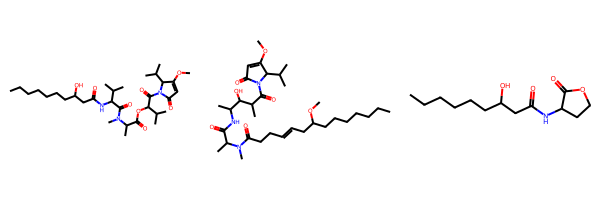

In [28]:
Chem.Draw.MolsToImage([Kav_mol, s_old_mol, s_new_mol ])

In [29]:
def compute_cos_sim(fp1, fp2):
    fp1 = fp1.float()
    fp2 = fp2.float()
    return (fp1 @ fp2) / (torch.norm(fp1) * torch.norm(fp2)).item()

In [33]:
kav_A_FP = fp_loader.build_mfp_for_new_SMILES(Kavaratamide_A_SMILES)
s_old_FP = fp_loader.build_mfp_for_new_SMILES(s_old)
s_new_FP = fp_loader.build_mfp_for_new_SMILES(s_new)

In [35]:
print(f"cos sim between Kavaratamide A and old SMILES: {compute_cos_sim(kav_A_FP, s_old_FP)}")
print(f"cos sim between Kavaratamide A and new SMILES: {compute_cos_sim(kav_A_FP, s_new_FP)}")

cos sim between Kavaratamide A and old SMILES: 0.6939095258712769
cos sim between Kavaratamide A and new SMILES: 0.5979254841804504


In [32]:
from inference.inference_utils import show_retrieved_mol_with_highlighted_frags

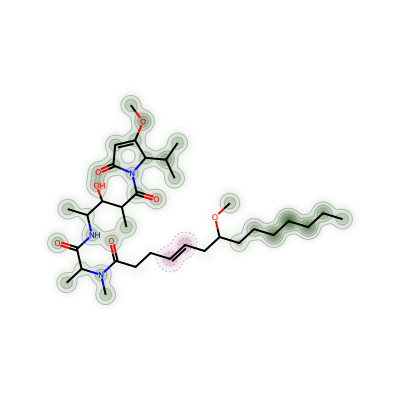

In [39]:
show_retrieved_mol_with_highlighted_frags(kav_A_FP, s_old)